<a href="https://colab.research.google.com/github/Srivardini11/lark/blob/main/Kepler_light_curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install astroquery astro-gala

     |████████████████████████████████| 4.5 MB 10.6 MB/s 
     |████████████████████████████████| 12.5 MB 57.9 MB/s 
     |████████████████████████████████| 802 kB 75.1 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 3.6 MB 45.7 MB/s 
  Created wheel for mimeparse: filename=mimeparse-0.1.3-py3-none-any.whl size=3864 sha256=dbea34464d7d6f2ed274aacc170b58f8a36bcdfd447e6a3335a8acd3070d416b
  Stored in directory: /root/.cache/pip/wheels/49/b4/2d/0081759ae1833bd694024801f7aacddcda8a687e8d5fbaeebd
Successfully built mimeparse


# **Imports**


In [14]:
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import seaborn as sb
import os
sb.set_style('darkgrid')

# **Data**

In [3]:
from astroquery.mast import Mast
from astroquery.mast import Observations
kepler_obs= Observations.query_criteria(target_name="kplr011446443",obs_collection='kepler')
kepler_product= Observations.get_product_list(kepler_obs[1])
kepler_filter = Observations.filter_products(kepler_product, extension ='kplr011446443-2009131110544_slc.fits', mrp_only= False) 
kepler_filter


obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level
str6,str6,str10,str36,str60,str1,str110,str7,str28,str8,str1,str6,str1,str7,str44,int64,str6,str6,int64
601031,Kepler,timeseries,kplr011446443_sc_Q113313330333033302,Lightcurve Short Cadence (CSC) - Q0,C,mast:KEPLER/url/missions/kepler/lightcurves/0114/011446443/kplr011446443-2009131110544_slc.fits,SCIENCE,Minimum Recommended Products,SLC,--,Kepler,--,EX_STKS,kplr011446443-2009131110544_slc.fits,1457280,601031,PUBLIC,2


In [4]:
Observations.download_products(kepler_filter, mrp_only=False, cache= False)

Local Path,Status,Message,URL
str95,str8,object,object
./mastDownload/Kepler/kplr011446443_sc_Q113313330333033302/kplr011446443-2009131110544_slc.fits,COMPLETE,None,None


In [6]:
filename = "./mastDownload/Kepler/kplr011446443_sc_Q113313330333033302/kplr011446443-2009131110544_slc.fits"
fits.info(filename)

Filename: ./mastDownload/Kepler/kplr011446443_sc_Q113313330333033302/kplr011446443-2009131110544_slc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   ()      
  1  LIGHTCURVE    1 BinTableHDU    155   14280R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        48   (8, 9)   int32   


In [7]:
with fits.open(filename) as hdulist:
  hdr1 = hdulist[1].header
print(repr(hdr1[0:24]))

XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100 / length of first array dimension                
NAXIS2  =                14280 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   20 / number of table fields                         
TTYPE1  = 'TIME    '           / column title: data time stamps                 
TFORM1  = 'D       '           / column format: 64-bit floating point           
TUNIT1  = 'BJD - 2454833'      / column units: barycenter corrected JD          
TDISP1  = 'D14.7   '           / column display format                          
TTYPE2  = 'TIMECORR'        

In [8]:
with fits.open(filename) as hdulist:
  bnry1 = hdulist[1].data
table = Table(bnry1)  
table[1:9]

TIME,TIMECORR,CADENCENO,SAP_FLUX,SAP_FLUX_ERR,SAP_BKG,SAP_BKG_ERR,PDCSAP_FLUX,PDCSAP_FLUX_ERR,SAP_QUALITY,PSF_CENTR1,PSF_CENTR1_ERR,PSF_CENTR2,PSF_CENTR2_ERR,MOM_CENTR1,MOM_CENTR1_ERR,MOM_CENTR2,MOM_CENTR2_ERR,POS_CORR1,POS_CORR2
float64,float32,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
120.52992386784899,0.00096672785,5501,401288.16,91.51187,2598.1086,0.5752603,406100.9,127.528824,0,nan,nan,nan,nan,621.2181187542091,0.0002101067,848.8972881655714,0.00029125414,0.0002031729,-0.0025746305
120.53060508973431,0.00096674974,5502,401425.53,91.53448,2598.0261,0.57525027,406242.22,125.212105,0,nan,nan,nan,nan,621.2190207168474,0.00021018942,848.8935790650855,0.0002912894,0.00021144762,-0.0025837936
120.53128621167707,0.0009667717,5503,401172.0,91.517265,2597.9438,0.5752402,405984.03,123.31339,0,nan,nan,nan,nan,621.2179228162092,0.00021032244,848.894852260174,0.0002914222,0.00021972114,-0.0025929555
120.53196743356966,0.00096679357,5504,401473.62,91.53064,2597.8613,0.5752302,406293.0,121.84987,0,nan,nan,nan,nan,621.2198263101714,0.00021020704,848.8961790332079,0.00029115527,0.00022799587,-0.0026021185
120.53264855545422,0.00096681545,5505,401465.44,91.54753,2597.7788,0.5752201,406285.44,120.76684,0,nan,nan,nan,nan,621.2181449557879,0.00021010762,848.8938428073742,0.00029126246,0.00023626939,-0.0026112802
120.53332967733877,0.00096683734,5506,401342.0,91.52074,2597.696,0.5752101,406160.03,119.99098,0,nan,nan,nan,nan,621.2196936139239,0.00021003291,848.8949354580448,0.00029143397,0.0002445429,-0.002620442
120.53401069928077,0.0009668593,5507,401485.1,91.547424,2597.6135,0.5752001,406306.9,119.55807,0,nan,nan,nan,nan,621.217917087657,0.00021020496,848.8943553794189,0.00029132605,0.0002528152,-0.0026296026
120.53469192116609,0.00096688117,5508,401244.03,91.507996,2597.531,0.57519,406061.28,119.339294,0,nan,nan,nan,nan,621.2198208358801,0.00021007679,848.8961781439671,0.0002913169,0.00026108994,-0.0026387656


In [9]:
with fits.open(filename, mode="readonly") as hdulist:
  bjdrefi = hdulist[1].header['BJDREFI']
  bjdreff = hdulist[1].header['BJDREFF']

  times = hdulist[1].data['time']
  sap_fluxes = hdulist[1].data['sap_flux']
  pdcsap_fluxes = hdulist[1].data['pdcsap_flux']

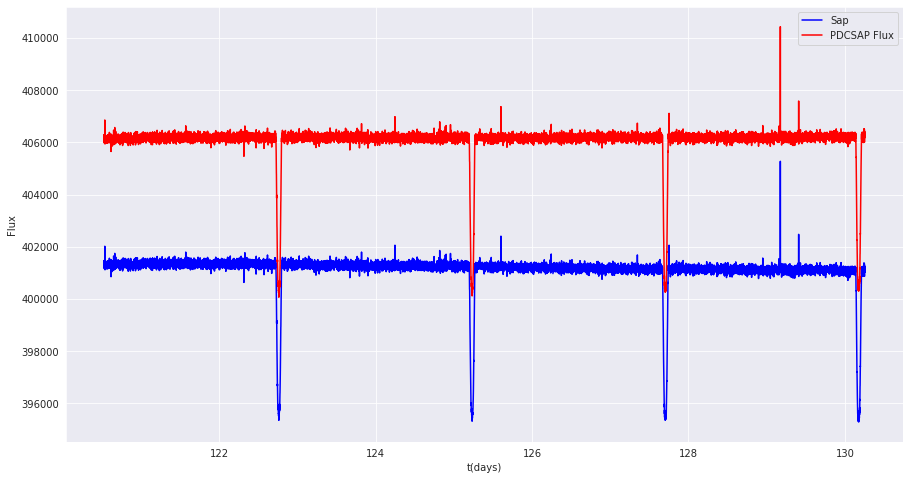

In [19]:
bjds = times + bjdrefi + bjdreff

plt.figure(figsize =(15,8))

plt.plot(times, sap_fluxes, '-b', label ='Sap')
plt.plot(times, pdcsap_fluxes, '-r', label='PDCSAP Flux') 
plt.xlabel('t(days)')
plt.ylabel('Flux')
plt.legend()

plt.show()

In [25]:
with fits.open(filename) as hdulist: 
    imgdata = hdulist[2].data

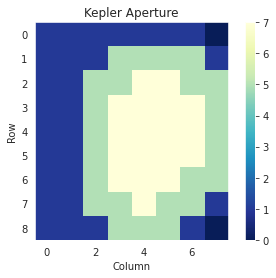

In [24]:
plt.imshow(imgdata, cmap=plt.cm.YlGnBu_r)
plt.title('Kepler Aperture')
plt.xlabel('Column')
plt.ylabel('Row')
plt.grid(False)
plt.colorbar()